# Git in DataFrames

python + git + dataframe = [git-pandas](http://wdm0006.github.io/git-pandas/)

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Repository

In [3]:
from gitpandas import Repository
tries = ["../..", "../../.."]
err = None
for t in tries:
    try:
        repo = Repository(working_dir=t, verbose=True)
        err = None
        break
    except Exception as e:
        err = e
        continue
if err is not None:
    import os
    raise Exception("issue in current folder '{0}'".format(os.getcwd())) from err

Repository [pyquickhelper] instantiated at directory: ../..


In [4]:
repo.branches()

,branch,local,repository
0,master,True,pyquickhelper
1,master,False,pyquickhelper


One funny function. No idea if that gives a good estimation.

In [5]:
try:
    use = repo.hours_estimate()
except Exception as e:
    # Not always reliable.
    print(e)
    use = None
use

c:\python370_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,committer,hours
0,azure provisioned user,2.483333
1,xavier dupré,494.288889
2,sdpython,107.178611
3,Ensaegithubxd,0.000000
4,dupre,515.906667
5,ped4747,0.000000


In [6]:
if use is not None:
    workdays = use.hours.sum() / 8
else:
    workdays = None
workdays

139.98218749999998

I might be very slow then :) becauase I think I spend more time than that.

## Logs

The following cane take some time depending on you repository size.

In [7]:
try:
    hist = repo.commit_history()
except Exception as e:
    # Not always reliable.
    print(e)
    import pandas
    hist = pandas.DataFrame()
hist.head()

c:\python370_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,author,committer,message,lines,insertions,deletions,net
date,,,,,,,
2018-08-28 09:46:06,xavier dupré,xavier dupré,fix configuration\n,9,3,6,-3
2018-08-28 09:34:34,xavier dupré,xavier dupré,checks sphinx configuration + pep8\n,37,18,19,-1
2018-08-28 09:10:13,xavier dupré,xavier dupré,fix indentation\n,4,2,2,0
2018-08-28 09:08:19,xavier dupré,xavier dupré,check latex file\n,6,6,0,6
2018-08-28 00:42:24,xavier dupré,xavier dupré,"Fixes #183, formulas converted into svg for HT...",39,19,20,-1


In [8]:
try:
    histf = repo.file_change_history()
except Exception as e:
    # Not always reliable.
    print(e)
    import pandas
    histf = pandas.DataFrame(dict(filename=[""]))
histf.head()

c:\python370_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,author,committer,message,rev,filename,insertions,deletions
date,,,,,,,
2018-08-28 09:46:06,xavier dupré,xavier dupré,fix configuration\n,8e22c030351726852905509b908d05542da6bac1,src/pyquickhelper/helpgen/default_conf.py,3,6
2018-08-28 09:34:34,xavier dupré,xavier dupré,checks sphinx configuration + pep8\n,b8b084fd0522028b37d8d306e3666b93accce7fd,.circleci/config.yml,0,6
2018-08-28 09:34:34,xavier dupré,xavier dupré,checks sphinx configuration + pep8\n,b8b084fd0522028b37d8d306e3666b93accce7fd,src/pyquickhelper/filehelper/internet_helper.py,1,1
2018-08-28 09:34:34,xavier dupré,xavier dupré,checks sphinx configuration + pep8\n,b8b084fd0522028b37d8d306e3666b93accce7fd,src/pyquickhelper/helpgen/default_conf.py,17,12
2018-08-28 09:10:13,xavier dupré,xavier dupré,fix indentation\n,6f4a34eb5b39fdd08d85a5189abc64cfe5f7a7e1,.circleci/config.yml,2,2


In [9]:
histf.tail()

,author,committer,message,rev,filename,insertions,deletions
date,,,,,,,
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/sync/file_tree_node.py,399,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/sync/synchelper.py,256,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/unittests/__init__.py,0,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/unittests/utils_tests.py,280,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/version.txt,1,0


## Check removed files

In [10]:
unique = set(histf.filename)
len(unique)

1067

In [11]:
import os
sorted_unique = list(sorted(unique))
full_path = [os.path.join(repo.repo.working_dir, _) for _ in sorted_unique]

In [12]:
import numpy
exists = [os.path.exists(f) for f in full_path]
sizes = [os.stat(f).st_size if os.path.exists(f) else numpy.nan for f in full_path]

In [13]:
import pandas
removed = pandas.DataFrame(dict(name=sorted_unique, exists=exists, size=sizes))
removed.sort_values("size").dropna().tail()

,name,exists,size
297,_unittests/ut_helpgen/notebooks_slides/js_boke...,True,424724.0
966,src/pyquickhelper/sphinxext/revealjs/templates...,True,476557.0
506,_unittests/ut_pycode/data/coverage/coverage_re...,True,507382.0
596,_unittests/ut_sphinxext/data/video/mur.mp4,True,625634.0
225,_unittests/ut_helpgen/data/completion_profilin...,True,1402712.0


How many files not exist anymore?

In [14]:
removed[~removed.exists].shape

(207, 3)

In [15]:
removed[~removed.exists].head()

,name,exists,size
0,"""_unittests/ut_sync/data/bug/bugged/Pr\303\251...",False,NaN
1,"""_unittests/ut_sync/data/bug/bugged/Pr\303\251...",False,NaN
2,.circle.yml,False,NaN
3,.circle.yml => circle.yml,False,NaN
5,.coveragerc,False,NaN


In [16]:
g = repo.repo.git()

In [17]:
print(g.execute('git log --log-size --abbrev --follow "build_script.bat"'))

commit 7b34578848f96fea15c1fc96c1cece354f87ba90
log size 115
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Sun Jul 22 12:36:29 2018 +0200

    update build_script.bat

commit 27b203dd00658808925ab0ed24e91e7f34609254
log size 122
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Thu May 17 00:45:25 2018 +0200

    documentation, setup, circleci

commit 56950d8a1d41163c72e8cb7f1aac45dc2d4e5789
log size 112
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Mon Jan 8 13:22:00 2018 +0100

    fix failing unit test

commit 69c1a226c2f5724102ca2e5f22a1d6a126e701be
log size 104
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Fri Dec 1 00:50:58 2017 +0100

    fix appeveyor

commit f6e286c70b44bac822a51eb38cf48f4c387947dc
log size 105
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Wed Nov 29 12:25:19 2017 +0100

    update script

commit eba47ba0e8fb6cd7b10f62628a6ae71731b7418f
log size 105
Author: xavier dupré <xavier.dupre@gmail.com>
Date:   Sat Mar 11 22:24:45 20

In [18]:
from pyquickhelper.loghelper.repositories.pygit_helper import get_repo_log
res = get_repo_log(repo.repo.working_dir)
res[0]

['xavier dupré',
 '8e22c030',
 datetime.datetime(2018, 8, 28, 0, 0),
 'fix configuration',
 '8e22c030351726852905509b908d05542da6bac1',
 'https://github.com/sdpython/pyquickhelper/commit/8e22c030351726852905509b908d05542da6bac1']

In [19]:
df = pandas.DataFrame(data=res, columns="owner hash datetime comment full_hash path".split())
df.head()

,owner,hash,datetime,comment,full_hash,path
0,xavier dupré,8e22c030,2018-08-28,fix configuration,8e22c030351726852905509b908d05542da6bac1,https://github.com/sdpython/pyquickhelper/comm...
1,xavier dupré,b8b084fd,2018-08-28,checks sphinx configuration + pep8,b8b084fd0522028b37d8d306e3666b93accce7fd,https://github.com/sdpython/pyquickhelper/comm...
2,xavier dupré,6f4a34eb,2018-08-28,fix indentation,6f4a34eb5b39fdd08d85a5189abc64cfe5f7a7e1,https://github.com/sdpython/pyquickhelper/comm...
3,xavier dupré,e354d3e4,2018-08-28,check latex file,e354d3e4cdfcc4c643f357c5d6c8c53e47a2bc82,https://github.com/sdpython/pyquickhelper/comm...
4,xavier dupré,6e030b7f,2018-08-28,"Fixes #183, formulas converted into svg for HT...",6e030b7f21a3a439f6945ef477e4f3b9728fc9db,https://github.com/sdpython/pyquickhelper/comm...


In [20]:
res = get_repo_log(repo.repo.working_dir, file_detail=True)
res[0]

('xavier dupré',
 '8e22c030',
 datetime.datetime(2018, 8, 28, 0, 0),
 'fix configuration',
 '8e22c030351726852905509b908d05542da6bac1',
 'https://github.com/sdpython/pyquickhelper/commit/8e22c030351726852905509b908d05542da6bac1',
 'src/pyquickhelper/helpgen/default_conf.py',
 9,
 0)

In [21]:
df = pandas.DataFrame(data=res, columns="owner hash datetime comment full_hash path name net bytes".split())
df.head()

,owner,hash,datetime,comment,full_hash,path,name,net,bytes
0,xavier dupré,8e22c030,2018-08-28,fix configuration,8e22c030351726852905509b908d05542da6bac1,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/helpgen/default_conf.py,9,0
1,xavier dupré,b8b084fd,2018-08-28,checks sphinx configuration + pep8,b8b084fd0522028b37d8d306e3666b93accce7fd,https://github.com/sdpython/pyquickhelper/comm...,.circleci/config.yml,6,0
2,xavier dupré,b8b084fd,2018-08-28,checks sphinx configuration + pep8,b8b084fd0522028b37d8d306e3666b93accce7fd,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/filehelper/internet_helper.py,2,0
3,xavier dupré,b8b084fd,2018-08-28,checks sphinx configuration + pep8,b8b084fd0522028b37d8d306e3666b93accce7fd,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/helpgen/default_conf.py,29,0
4,xavier dupré,6f4a34eb,2018-08-28,fix indentation,6f4a34eb5b39fdd08d85a5189abc64cfe5f7a7e1,https://github.com/sdpython/pyquickhelper/comm...,.circleci/config.yml,4,0


In [22]:
df["ext"] = df.name.apply(lambda x: os.path.splitext(x)[-1].strip())
df.head(n=2)

,owner,hash,datetime,comment,full_hash,path,name,net,bytes,ext
0,xavier dupré,8e22c030,2018-08-28,fix configuration,8e22c030351726852905509b908d05542da6bac1,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/helpgen/default_conf.py,9,0,.py
1,xavier dupré,b8b084fd,2018-08-28,checks sphinx configuration + pep8,b8b084fd0522028b37d8d306e3666b93accce7fd,https://github.com/sdpython/pyquickhelper/comm...,.circleci/config.yml,6,0,.yml


In [23]:
gr = df[df.ext.isin((".py", ".ipynb", ".txt", ".zip", ".yml"))].groupby("ext").sum()
gr.T

ext,.ipynb,.py,.txt,.yml,.zip
net,65801,170216,3593,1315,0
bytes,0,0,0,0,179637


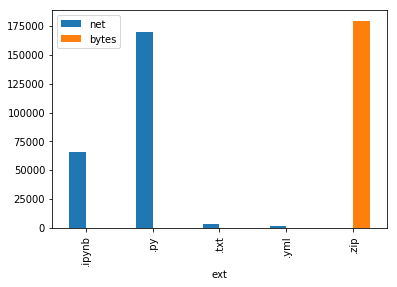

In [24]:
gr.plot(kind="bar");